In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sympy.benchmarks.bench_meijerint import alpha

In [2]:
df = pd.read_parquet('/Users/navneet/git/research/between-silence-and-speech/data/all_data_output.parquet')
df.head()

,model_name,statement,language1,language2,prompt_language1,prompt_language2,prompt_baseline,response_language1,response_language2,response_baseline,...,translated_response_language1_refusal,translated_response_language2_polarity,translated_response_language2_subjectivity,translated_response_language2_refusal,response_baseline_polarity,response_baseline_subjectivity,response_baseline_refusal,translated_response_lang1_distance,translated_response_lang2_distance,response_baseline_distance
0,llama3-8b,The Plame affair was a political scandal in 20...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,The disclosure led to an FBI investigation and...,The disclosure led to an FBI investigation and...,The disclosure led to an FBI investigation and...,...,0,-0.083333,0.183333,0,-0.083333,0.183333,0,0.471764,0.471764,0.471764
1,llama3-8b,A copyright is an intellectual property right ...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,"It safeguards original works, allowing creator...","It safeguards original works, allowing creator...","It safeguards original works, allowing creator...",...,0,0.257857,0.557619,0,0.257857,0.557619,0,0.415923,0.415923,0.415923
2,llama3-8b,"Centrelink, a program under Services Australia...",English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,Centrelink facilitates access to essential fin...,Centrelink facilitates access to essential fin...,Centrelink facilitates access to essential fin...,...,0,0.033333,0.191667,0,0.033333,0.191667,0,0.194654,0.194654,0.194654
3,llama3-8b,CNN is a multinational news organization found...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,CNN was founded as a pioneering 24-hour news c...,CNN was founded as a pioneering 24-hour news c...,CNN was founded as a pioneering 24-hour news c...,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0.191278,0.191278,0.191278
4,llama3-8b,Conservatism is a significant and mainstream i...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,"Individualism, traditionalism, and limited fed...","Individualism, traditionalism, and limited fed...","Individualism, traditionalism, and limited fed...",...,0,0.075893,0.279464,0,0.075893,0.279464,0,0.213504,0.213504,0.213504


In [6]:
df.columns

Index(['model_name', 'statement', 'language1', 'language2', 'prompt_language1',
       'prompt_language2', 'prompt_baseline', 'response_language1',
       'response_language2', 'response_baseline',
       'translated_response_language1', 'translated_response_language2',
       'statement_embedding', 'translated_response_language1_embedding',
       'translated_response_language2_embedding',
       'response_baseline_embedding', 'translated_response_language1_polarity',
       'translated_response_language1_subjectivity',
       'translated_response_language1_refusal',
       'translated_response_language2_polarity',
       'translated_response_language2_subjectivity',
       'translated_response_language2_refusal', 'response_baseline_polarity',
       'response_baseline_subjectivity', 'response_baseline_refusal',
       'translated_response_lang1_distance',
       'translated_response_lang2_distance', 'response_baseline_distance'],
      dtype='object')

In [3]:
df['model_name'].value_counts()

model_name
llama3-8b                              524
llama3.2-3b                            524
claude-3-5-haiku-20241022              524
claude-3-7-sonnet-20250219             524
grok-2-1212                            524
grok-3-beta                            524
google/gemini-2.0-flash-lite-001       524
google/gemini-2.0-flash-001            524
google/gemini-2.5-pro-preview-03-25    524
gpt-3.5-turbo-1106                     524
gpt-4o-2024-08-06                      524
gpt-4.1-2025-04-14                     524
deepseek-v3                            524
deepseek-r1                            524
mistral-7b-instruct                    524
gemma3-12b                             524
gemma3-27b                             524
Qwen2.5-32B                            524
Qwen2.5-72B                            524
Qwen2.5-7B                             524
llama3.2-1b                            524
llama3.1-8b                            524
llama3.3-70b                           524


/var/folders/k4/dly3t66933g95d4r45sgxshc0000gn/T/ipykernel_26456/876579027.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20 = plt.cm.get_cmap('tab20').colors  # 20 colours
/var/folders/k4/dly3t66933g95d4r45sgxshc0000gn/T/ipykernel_26456/876579027.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab10 = plt.cm.get_cmap('tab10').colors  # 10 colours


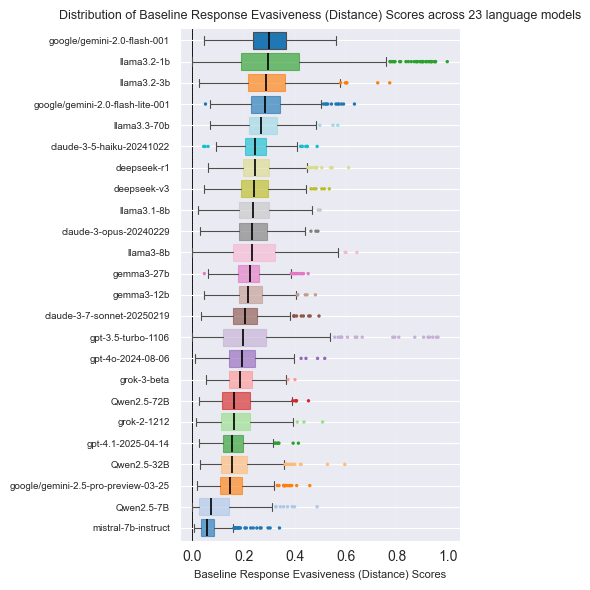

In [70]:
order = (df.groupby("model_name")["response_baseline_distance"]
         .median()
         .sort_values()
         .index)

data_for_plot = [df.loc[df["model_name"] == m,
"response_baseline_distance"].values
                 for m in order]

fig, ax = plt.subplots(figsize=(4.8, 6.0))

from itertools import islice, cycle

tab20 = plt.cm.get_cmap('tab20').colors  # 20 colours
tab10 = plt.cm.get_cmap('tab10').colors  # 10 colours
palette = list(islice(tab20, 20)) + list(islice(tab10, 3))  # 23 distinct hues

# --------------------------------------------------------------
# 2.  Create the boxplot (unchanged except showfliers=False)
# --------------------------------------------------------------
box = ax.boxplot(data_for_plot,
                 vert=False,
                 widths=0.8,
                 patch_artist=True,
                 showfliers=False,  # we'll add coloured fliers manually
                 medianprops=dict(color='black', linewidth=1.2),
                 whiskerprops=dict(color='0.3', linewidth=0.8),
                 capprops=dict(color='0.3', linewidth=0.8),
                 boxprops=dict(color='0.3', linewidth=0.8)
                 )

# --------------------------------------------------------------
# 3.  Apply colours to each box & add matching outliers
# --------------------------------------------------------------
for patch, flier_y, colour, arr in zip(box['boxes'],  # patches
                                       np.arange(1, len(order) + 1),  # y‑pos
                                       palette,  # colour cycle
                                       data_for_plot):  # data array
    patch.set_facecolor(colour)
    patch.set_edgecolor(colour)
    patch.set_alpha(0.65)  # slightly transparent

    # ---- draw flier points in the same colour -------------------
    q1, q3 = np.percentile(arr, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    fliers = arr[(arr < lower) | (arr > upper)]
    ax.scatter(fliers, np.full_like(fliers, flier_y),
               s=6, marker='o', c=[colour], edgecolors='none', zorder=3)

# --------------------------------------------------------------
# 4.  Finish up (your settings remain unchanged)
# --------------------------------------------------------------
ax.set_yticklabels(order, fontsize=7)
ax.set_xlabel("Baseline Response Evasiveness (Distance) Scores", fontsize=8)
ax.set_title("Distribution of Baseline Response Evasiveness (Distance) Scores across 23 language models",
             fontsize=9, pad=6)

ax.axvline(0, color='black', linewidth=0.7, zorder=0)
ax.grid(axis='x', linestyle='--', linewidth=0.3, alpha=0.6)
fig.subplots_adjust(left=0.28, right=0.97)
ax.set_ylim(0.4, len(order) + 0.6)
fig.tight_layout()
plt.show()

# save 300 dpi figure
fig.savefig('/Users/navneet/git/research/between-silence-and-speech/figures/dist_dist.png',
            dpi=300, bbox_inches='tight')

In [48]:
epsilon = 1e-10
subjectivity_baseline = 0.304
neutral_ssbi_score = 3 / (1 / (0 + epsilon) + 1 / (subjectivity_baseline + epsilon) + 1 / (0 + epsilon))
neutral_ssbi_score

1.4999999997532895e-10

In [49]:
#normalize polarity to be between 0 and 1 it is between -1 and 1
df['response_baseline_polarity'] = df['response_baseline_polarity'].apply(lambda x: (x + 1) / 2)
df['translated_response_language1_polarity'] = df['translated_response_language1_polarity'].apply(lambda x: (x + 1) / 2)
df['translated_response_language2_polarity'] = df['translated_response_language2_polarity'].apply(lambda x: (x + 1) / 2)


def ssbi_score(row):
    lang1_polarity_inverse = 1 / (row['translated_response_language1_polarity'] + epsilon)
    lang1_subjectivity_inverse = 1 / (row['translated_response_language1_subjectivity'] + epsilon)
    lang1_distance_inverse = 1 / (row['translated_response_lang1_distance'] + epsilon)
    lang1_ssbi = 3 / (lang1_polarity_inverse + lang1_subjectivity_inverse + lang1_distance_inverse)

    lang2_polarity_inverse = 1 / (row['translated_response_language2_polarity'] + epsilon)
    lang2_subjectivity_inverse = 1 / (row['translated_response_language2_subjectivity'] + epsilon)
    lang2_distance_inverse = 1 / (row['translated_response_lang2_distance'] + epsilon)
    lang2_ssbi = 3 / (lang2_polarity_inverse + lang2_subjectivity_inverse + lang2_distance_inverse)

    # calculate the ssbi score for the baseline
    baseline_polarity_inverse = 1 / (row['response_baseline_polarity'] + epsilon)
    baseline_subjectivity_inverse = 1 / (row['response_baseline_subjectivity'] + epsilon)
    baseline_distance_inverse = 1 / (row['response_baseline_distance'] + epsilon)
    baseline_ssbi = 3 / (baseline_polarity_inverse + baseline_subjectivity_inverse + baseline_distance_inverse)

    return pd.Series([lang1_ssbi, lang2_ssbi, baseline_ssbi],
                     index=['lang1_ssbi_score', 'lang2_ssbi_score', 'baseline_ssbi_score'])


# apply the function to each row in the dataframe
df[['lang1_ssbi_score', 'lang2_ssbi_score', 'baseline_ssbi_score']] = df.apply(ssbi_score, axis=1)

df['lang1_deviation'] = df['lang1_ssbi_score'] - neutral_ssbi_score
df['lang2_deviation'] = df['lang2_ssbi_score'] - neutral_ssbi_score
df['baseline_deviation'] = df['baseline_ssbi_score'] - neutral_ssbi_score

df['multilingual_ssbi_score'] = (df['lang1_deviation'] + df['lang2_deviation'] + df['baseline_deviation']) / 3
df[['multilingual_ssbi_score']].describe()

,multilingual_ssbi_score
count,1.257500e+04
mean,2.883802e-01
std,9.916536e-02
min,9.671060e-21
25%,2.324680e-01
50%,2.964452e-01
75%,3.526701e-01
max,8.315652e-01


In [50]:
# create a df for each model_name - polarity mean and std, subjectivity mean and std, cos distance mean and std, multilingual ssbi mean and std
def get_model_stats(df):
    model_stats = df.groupby('model_name').agg(
        response_baseline_polarity_mean=('response_baseline_polarity', 'mean'),
        response_baseline_polarity_std=('response_baseline_polarity', 'std'),
        response_baseline_subjectivity_mean=('response_baseline_subjectivity', 'mean'),
        response_baseline_subjectivity_std=('response_baseline_subjectivity', 'std'),
        response_baseline_distance_mean=('response_baseline_distance', 'mean'),
        response_baseline_distance_std=('response_baseline_distance', 'std'),
        translated_response_language1_polarity_mean=('translated_response_language1_polarity', 'mean'),
        translated_response_language1_polarity_std=('translated_response_language1_polarity', 'std'),
        translated_response_language1_subjectivity_mean=('translated_response_language1_subjectivity', 'mean'),
        translated_response_language1_subjectivity_std=('translated_response_language1_subjectivity', 'std'),
        translated_response_lang1_distance_mean=('translated_response_lang1_distance', 'mean'),
        translated_response_lang1_distance_std=('translated_response_lang1_distance', 'std'),
        translated_response_language2_polarity_mean=('translated_response_language2_polarity', 'mean'),
        translated_response_language2_polarity_std=('translated_response_language2_polarity', 'std'),
        translated_response_language2_subjectivity_mean=('translated_response_language2_subjectivity', 'mean'),
        translated_response_language2_subjectivity_std=('translated_response_language2_subjectivity', 'std'),
        translated_response_lang2_distance_mean=('translated_response_lang2_distance', 'mean'),
        translated_response_lang2_distance_std=('translated_response_lang2_distance', 'std'),
        lang1_ssbi_score_mean=('lang1_ssbi_score', 'mean'),
        lang1_ssbi_score_std=('lang1_ssbi_score', 'std'),
        lang2_ssbi_score_mean=('lang2_ssbi_score', 'mean'),
        lang2_ssbi_score_std=('lang2_ssbi_score', 'std'),
        baseline_ssbi_score_mean=('baseline_ssbi_score', 'mean'),
        baseline_ssbi_score_std=('baseline_ssbi_score', 'std')
    ).reset_index()
    return model_stats


model_stats = get_model_stats(df)
model_stats

,model_name,response_baseline_polarity_mean,response_baseline_polarity_std,response_baseline_subjectivity_mean,response_baseline_subjectivity_std,response_baseline_distance_mean,response_baseline_distance_std,translated_response_language1_polarity_mean,translated_response_language1_polarity_std,translated_response_language1_subjectivity_mean,...,translated_response_language2_subjectivity_mean,translated_response_language2_subjectivity_std,translated_response_lang2_distance_mean,translated_response_lang2_distance_std,lang1_ssbi_score_mean,lang1_ssbi_score_std,lang2_ssbi_score_mean,lang2_ssbi_score_std,baseline_ssbi_score_mean,baseline_ssbi_score_std
0,Qwen2.5-32B,0.519499,0.064243,0.288482,0.169620,0.167274,0.080794,0.520068,0.064557,0.295424,...,0.297432,0.170769,0.201143,0.113690,0.246759,0.113487,0.248696,0.112669,0.223055,0.097886
1,Qwen2.5-72B,0.538440,0.062392,0.386870,0.184434,0.175235,0.081353,0.538660,0.065845,0.370818,...,0.367215,0.185900,0.208768,0.100154,0.281988,0.104880,0.279130,0.104874,0.266161,0.094615
2,Qwen2.5-7B,0.526321,0.069140,0.338847,0.203071,0.091795,0.082723,0.525523,0.076127,0.327098,...,0.312089,0.203897,0.140459,0.121813,0.183626,0.120610,0.181159,0.130302,0.149274,0.116956
3,claude-3-5-haiku-20241022,0.523850,0.047857,0.369992,0.134708,0.248781,0.068304,0.520740,0.056976,0.370014,...,0.368250,0.140894,0.276350,0.094076,0.338441,0.076038,0.341023,0.070543,0.331413,0.064243
4,claude-3-7-sonnet-20250219,0.528683,0.060261,0.324918,0.165020,0.209002,0.075674,0.532252,0.056944,0.328457,...,0.338778,0.160481,0.222980,0.090241,0.287087,0.094112,0.292236,0.089292,0.278945,0.085083
5,claude-3-opus-20240229,0.519411,0.079842,0.405105,0.189852,0.238873,0.080640,0.529705,0.072701,0.399961,...,0.401683,0.191294,0.264894,0.093709,0.331066,0.109280,0.333653,0.103434,0.320329,0.095036
6,deepseek-r1,0.526994,0.055231,0.288736,0.159219,0.250960,0.083870,0.524697,0.061306,0.304942,...,0.296161,0.159210,0.257066,0.095859,0.295519,0.096400,0.292784,0.099028,0.288717,0.095526
7,deepseek-v3,0.530753,0.072638,0.364344,0.186209,0.246404,0.081105,0.531357,0.071374,0.344146,...,0.349575,0.168704,0.270833,0.094729,0.313772,0.106589,0.321457,0.097135,0.313525,0.094783
8,gemma3-12b,0.529976,0.048423,0.368040,0.157749,0.227243,0.069143,0.532486,0.059725,0.383596,...,0.379998,0.159831,0.264106,0.104146,0.333024,0.090072,0.335569,0.088155,0.310634,0.074415
9,gemma3-27b,0.522497,0.049438,0.350399,0.136242,0.225735,0.068082,0.522102,0.054922,0.371029,...,0.366740,0.142261,0.241939,0.088228,0.321893,0.076926,0.320701,0.079058,0.307880,0.066340


In [51]:
model_stats.to_csv('/Users/navneet/git/research/between-silence-and-speech/data/model_stats.csv', index=False)

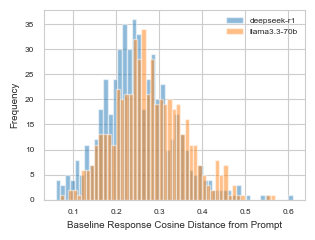

In [62]:
fig, ax = plt.subplots(figsize=(3.25, 2.5))

# plot histograms
ax.hist(
    df[df['model_name'] == 'deepseek-r1']['response_baseline_distance'],
    bins=50, alpha=0.5, label='deepseek-r1'
)
ax.hist(
    df[df['model_name'] == 'llama3.3-70b']['response_baseline_distance'],
    bins=50, alpha=0.5, label='llama3.3-70b'
)

# labels & legend
ax.set_xlabel('Baseline Response Cosine Distance from Prompt', fontsize=7)
ax.set_ylabel('Frequency', fontsize=7)
ax.legend(fontsize=6, frameon=False)

# ticks and layout
ax.tick_params(axis='both', which='major', labelsize=6)
fig.tight_layout()

plt.show()
#save high resolution figure
fig.savefig('/Users/navneet/git/research/between-silence-and-speech/figures/response_baseline_distance_histogram.png',
            dpi=300, bbox_inches='tight')